<a href="https://colab.research.google.com/github/heysourin/GNN-Graph-Neural-Network/blob/main/Creating%20Graph%20Using%20PyG/Graph_Networks_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -c "import torch; print(torch.version.cuda)"

12.1


In [2]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

2.3.1+cu121


In [4]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.3.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.3.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=507268 sha256=b1124a2043e9fdd1ff29cb1dfd3c0282467be5ab6024e0ee14665688a862b3a3
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter


In [5]:
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.3.1+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.3.1+cu121.html
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1092566 sha256=a2b89c10d27574259b991243836dd1602dc5950e0b5f69926a09c2b4598b9f89
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch-sparse


In [6]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00


In [7]:
import torch
# print torch version
print(torch.__version__)

2.3.1+cu121


In [8]:
from torch_geometric.data import Data

In [9]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

In [10]:
print(edge_index)
print(x)

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])
tensor([[-1.],
        [ 0.],
        [ 1.]])


In [11]:
from torch_geometric.data import Data
data = Data(x=x, edge_index=edge_index)

In [12]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [17]:
from torch_geometric.utils import to_networkx
G = to_networkx(data)

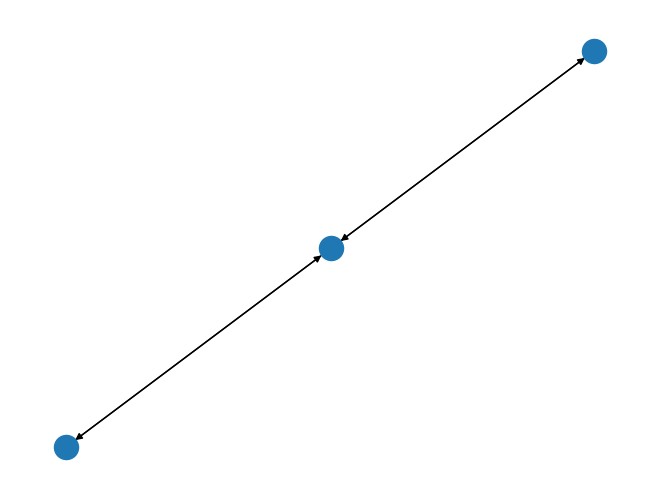

In [18]:
import networkx as nx
nx.draw(G)

In [19]:
data.keys

<bound method BaseData.keys of Data(x=[3, 1], edge_index=[2, 4])>

In [22]:
for key, item in data:
  print(f'{key} found in data')

x found in data
edge_index found in data


In [23]:
data.num_nodes

3

In [24]:
data.num_edges

4

In [25]:
data.num_node_features

1

In [26]:
data.has_isolated_nodes()

False

In [27]:
data.has_self_loops()

False

In [28]:
data.is_directed()

False

---
## **Another Example:**

In [29]:
edge_index = torch.tensor([[1, 2, 3, 4],
                           [5, 6, 7, 8]], dtype=torch.long)
x = torch.tensor([ [[1], [1], [1]], [[3],[3],[3]] ], dtype=torch.float)

In [30]:
x

tensor([[[1.],
         [1.],
         [1.]],

        [[3.],
         [3.],
         [3.]]])

In [31]:
# create graph data object
data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[2, 3, 1], edge_index=[2, 4])


In [32]:
data.num_edges

4

In [33]:
data.num_nodes

2

In [34]:
data.num_features

1

In [35]:
data.is_directed()

True

In [36]:
G = to_networkx(data)

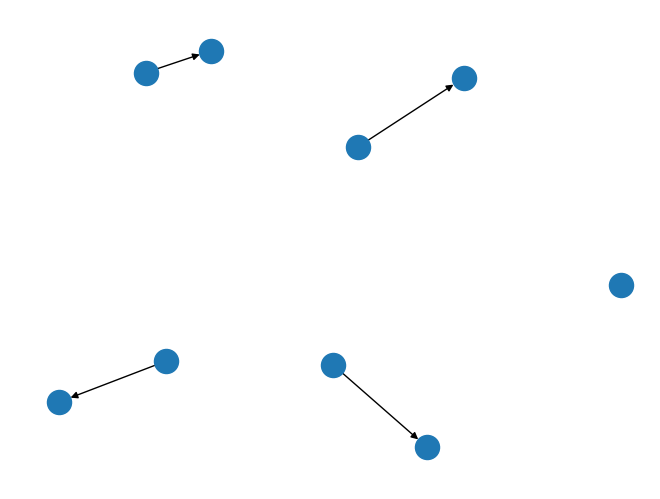

In [37]:
nx.draw(G)

In [38]:
print(data.x[0])

tensor([[1.],
        [1.],
        [1.]])


In [40]:
print(data.x[2])

IndexError: index 2 is out of bounds for dimension 0 with size 2

In [41]:
print(nx.is_weighted(G))
print(nx.is_directed(G))
print(G.order())
print(G.number_of_edges())
print(G.number_of_nodes())
print(G.edges)
print(G.nodes)

False
True
9
4
9
[(1, 5), (2, 6), (3, 7), (4, 8)]
[0, 1, 5, 2, 6, 3, 7, 4, 8]


In [42]:
nx.write_graphml(G, 'demo-8.graphml')